In [1]:
from IPython.display import Image

- references
    - https://moocaholic.medium.com/fp64-fp32-fp16-bfloat16-tf32-and-other-members-of-the-zoo-a1ca7897d407
    - https://evanw.github.io/float-toy/
- bf16: Ampere architecture

## float16

- 半精度（half precision）

### 表示

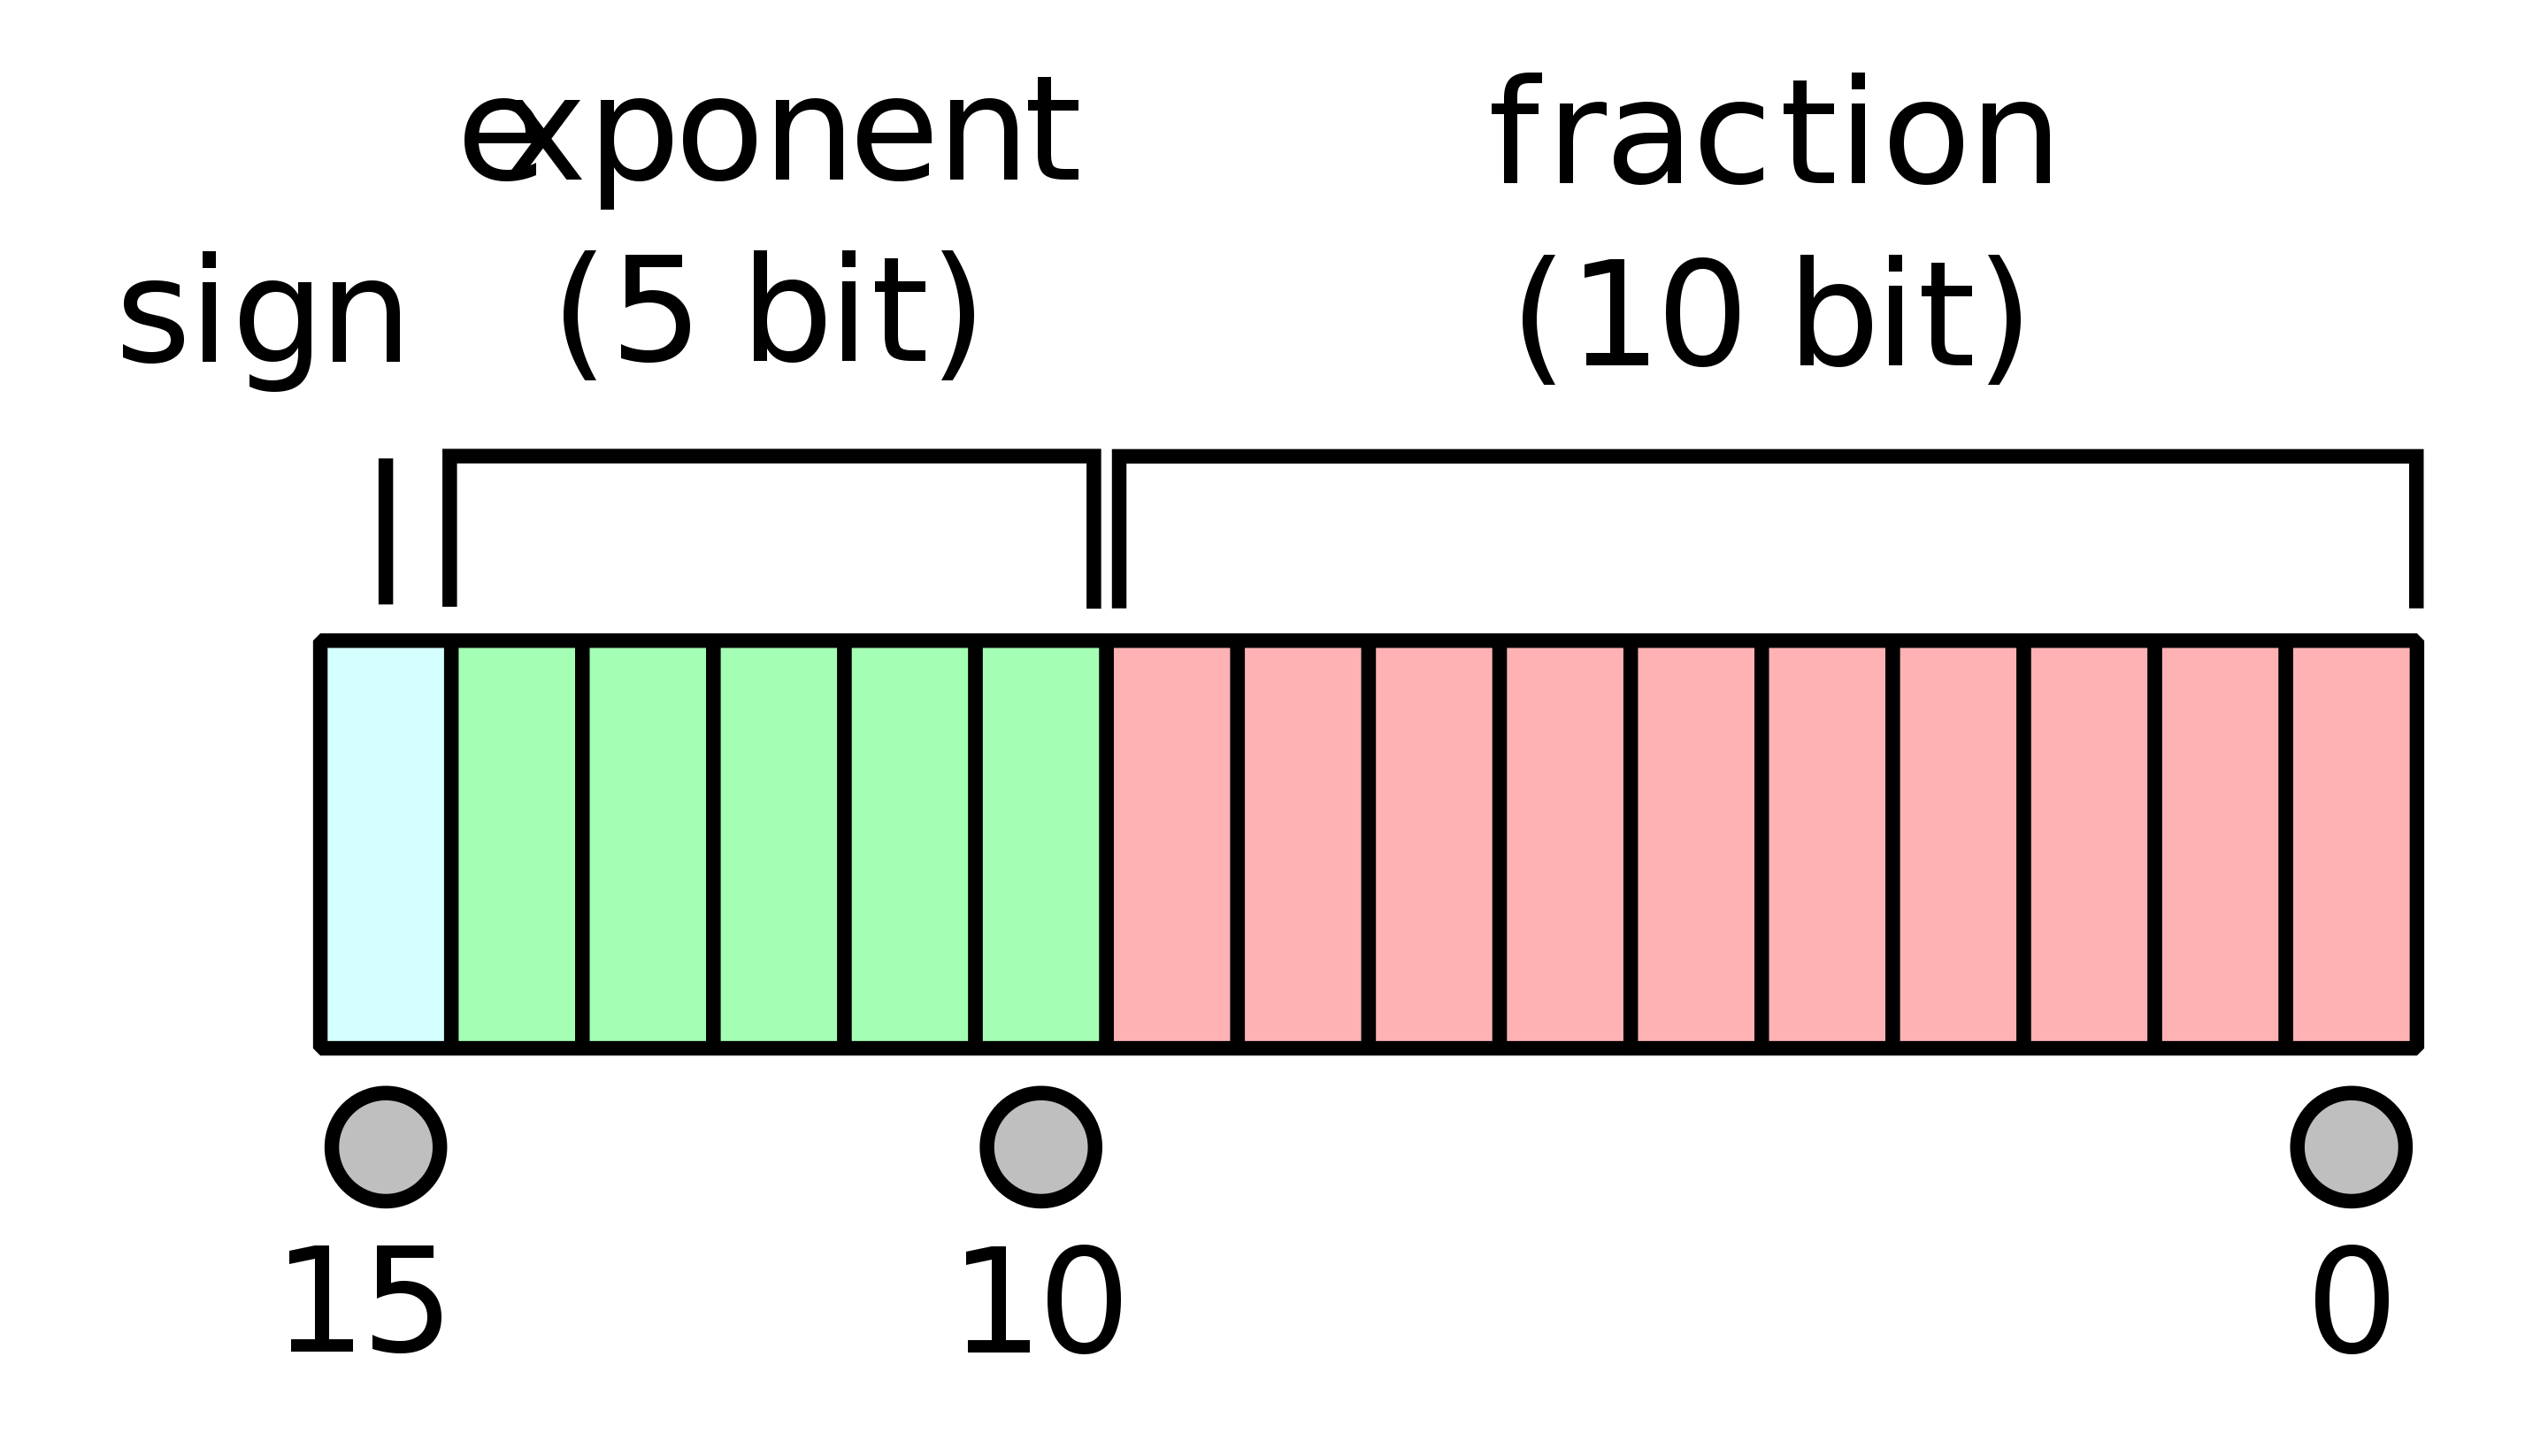

In [4]:
Image('../imgs/float16.png', width=400)

- 1：sign（符号位），5：exponent bits，10：mantissa bits
    - exponent：指数部分；
    - mantissa：小数部分；
- 指数部分
    - 共5位，全0/全1都有特殊的用途，
    - 表示范围 00001 ~ 11110（1 ~ 30)，
    - 减去偏置（15），指数部分（-14 ~ 15）
- 小数部分
    - 共10位，
    - 表示范围 0000000000 - 1111111111（0 ~ 1023）
    - 再除以 1024，(0 ~ 1023)/1024

### 计算

$$
(-1)^{\text{sign}}\cdot 2^{\text{exponent}-15}\cdot (1+\frac{\text{mantissa}}{1024})
$$

- 指数部分全 0
$$
(-1)^{\text{sign}}\cdot 2^{-14}\cdot (0+\frac{\text{mantissa}}{1024})
$$
- 指数部分全 1
    - 小数部分全为 0，表示 +inf、-inf
    - 小数部分不全为 0，表示 NaN

### 最小、最大、与精度

- 最大
    - 0 11110 1111111111
    - $(-1)^02^{30-15}(1+\frac{1023}{1024})$ == 65504
- 最小
    - 1 11110 1111111111
    - $(-1)^12^{30-15}(1+\frac{1023}{1024})$ == -65504
    - 正值的最小值
        - 0 00000 0000000001
        - $2^{-14}(0+1/1024)$ = 5.960464477539063e-08
- 精度
    - 0 00000 0000000001
    - $(-1)^02^{-14}(0+\frac1{1024}) == 2^{-24}$ 

### 计算示例

- 0 11101 1010000000
$$
2^{(29-15)}(1+\frac{640}{1024}) = 26624
$$

## bf16

- brain float 16
    - brain: google brain (TPU)

In [8]:
import torch
torch.cuda.is_bf16_supported()

True

In [9]:
torch.bfloat16

torch.bfloat16

In [13]:
torch.cuda.get_device_properties(torch.cuda.current_device())

_CudaDeviceProperties(name='NVIDIA GeForce RTX 4090', major=8, minor=9, total_memory=24217MB, multi_processor_count=128)

In [11]:
torch.version.hip

In [10]:
torch.cuda.is_bf16_supported??

- 1: 符号位
- 8：exponent bits（多了三个指数位）
- 7：mantissa bits

### range

$$
(-1)^{\text{sign}}2^{\text{exponent}-127}(1+\frac{\text{mantissa}}{128})
$$

- 最大值
    - 0 11111110 1111111
$$
2^{254-127}(1+\frac{127}{128})=3.3895313892515355e+38
$$

- 最小值
    - 1 11111110 1111111
$$
-2^{254-127}(1+\frac{127}{128})=-3.3895313892515355e+38
$$
    
    - 正值的最小值
        - 0 00000000 0000001
        - $2^{-126}(0+\frac1{128})=2^{-133}$ = 9.183549615799121e-41

## float16/float32, bf16

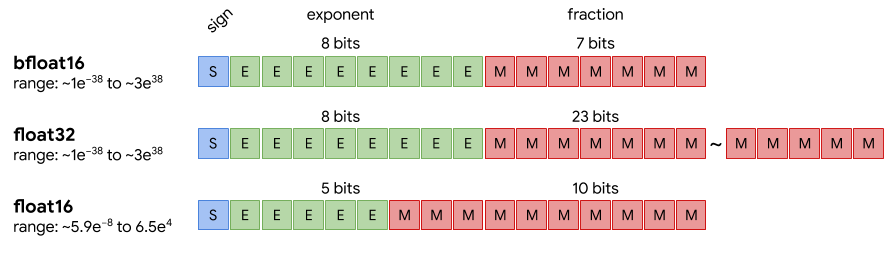

In [7]:
Image('../imgs/bf-float.png')